In [1]:
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import folium
from folium import plugins

In [2]:
df = pd.read_excel("C:/Users/masterx/Desktop/Анализ данных Python/docum/pm.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1115 non-null   datetime64[ns]
 1   s1      1115 non-null   float64       
 2   s2      1115 non-null   float64       
 3   s3      1115 non-null   float64       
 4   s4      1115 non-null   float64       
 5   s5      1115 non-null   float64       
 6   s6      1115 non-null   float64       
 7   s7      1115 non-null   float64       
 8   s9      1115 non-null   float64       
 9   s12     1115 non-null   float64       
 10  s14     1115 non-null   float64       
 11  s16     1115 non-null   float64       
 12  s18     1115 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 113.4 KB


In [4]:
df.head(10)

,date,s1,s2,s3,s4,s5,s6,s7,s9,s12,s14,s16,s18
0,2017-03-22,91.982979,91.982979,91.982979,91.982979,91.982979,91.982979,91.982979,91.982979,91.982979,91.982979,91.982979,91.982979
1,2017-03-23,84.649269,84.649269,84.649269,84.649269,84.649269,84.649269,84.649269,84.649269,84.649269,84.649269,84.649269,84.649269
2,2017-03-24,18.233358,43.675636,126.039535,126.039535,126.039535,126.039535,167.221484,126.039535,126.039535,126.039535,126.039535,126.039535
3,2017-03-25,20.095694,58.792217,63.183913,63.183913,63.183913,63.183913,65.379762,63.183913,63.183913,63.183913,63.183913,63.183913
4,2017-03-26,18.120582,48.348401,38.572597,40.061016,38.572597,38.572597,42.124840,38.572597,38.572597,38.572597,38.572597,38.572597
5,2017-03-27,16.711724,25.866109,70.422925,52.114979,70.422925,70.422925,28.065790,34.030815,34.030815,70.422925,34.030815,34.030815
6,2017-03-28,22.448005,23.530967,51.225897,40.061016,51.225897,51.225897,42.743600,40.061016,40.061016,51.225897,40.061016,40.061016
7,2017-03-29,57.024158,31.144359,49.615331,52.114979,49.615331,49.615331,63.850113,52.114979,52.114979,49.615331,52.114979,52.114979
8,2017-03-30,30.033238,29.700139,43.454735,49.298264,43.454735,43.454735,62.019090,49.298264,49.298264,43.454735,49.298264,49.298264
9,2017-03-31,35.086259,30.542797,39.346314,29.364089,39.346314,39.346314,38.652091,36.184571,36.184571,39.346314,36.184571,36.184571


In [5]:
df.tail(2)

,date,s1,s2,s3,s4,s5,s6,s7,s9,s12,s14,s16,s18
1113,2020-04-13,29.448156,29.812500,21.004172,26.392828,22.408078,18.579972,57.957550,21.414440,22.421419,26.892136,21.314505,24.255814
1114,2020-04-14,19.891911,26.120871,21.445372,32.027714,22.061892,17.652477,27.810153,20.568102,20.919637,23.809192,18.583449,15.511921


In [6]:
col = df.loc[: , "s1":"s18"]
df['average'] = col.mean(axis=1)
df.head(2)

,date,s1,s2,s3,s4,s5,s6,s7,s9,s12,s14,s16,s18,average
0,2017-03-22,91.982979,91.982979,91.982979,91.982979,91.982979,91.982979,91.982979,91.982979,91.982979,91.982979,91.982979,91.982979,91.982979
1,2017-03-23,84.649269,84.649269,84.649269,84.649269,84.649269,84.649269,84.649269,84.649269,84.649269,84.649269,84.649269,84.649269,84.649269


In [7]:
year = df['date'].dt.year
df['year'] = year

month = df['date'].dt.month
df['month'] = month

day = df['date'].dt.day
df['day'] = day

df.head(2)

,date,s1,s2,s3,s4,s5,s6,s7,s9,s12,s14,s16,s18,average,year,month,day
0,2017-03-22,91.982979,91.982979,91.982979,91.982979,91.982979,91.982979,91.982979,91.982979,91.982979,91.982979,91.982979,91.982979,91.982979,2017,3,22
1,2017-03-23,84.649269,84.649269,84.649269,84.649269,84.649269,84.649269,84.649269,84.649269,84.649269,84.649269,84.649269,84.649269,84.649269,2017,3,23


In [8]:
df17 = df[df.year==2017]
df17.describe()

,s1,s2,s3,s4,s5,s6,s7,s9,s12,s14,s16,s18,average,year,month,day
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.0,282.000000,282.000000
mean,59.802673,34.830458,42.670140,39.323406,40.101745,38.931571,61.021518,31.038805,24.108757,41.825870,51.660075,43.504359,42.401615,2017.0,7.872340,16.276596
std,48.613603,29.771333,36.341718,44.755919,41.429199,28.495082,52.609877,21.233095,15.769517,36.268958,54.757027,36.142442,32.519123,0.0,2.686068,8.892082
min,4.964286,5.112117,10.118312,5.491803,5.169102,13.159308,7.835447,4.717836,4.395543,10.440476,8.681383,5.611111,9.454231,2017.0,3.000000,1.000000
25%,27.979748,16.186387,20.584486,15.949416,15.800836,21.979029,26.102450,16.006450,12.952599,21.078052,20.534562,20.396429,20.928824,2017.0,6.000000,9.000000
50%,40.852804,23.351656,28.005255,22.838960,24.337504,28.244605,38.276355,24.037090,19.862005,27.989219,28.644967,28.644967,28.615183,2017.0,8.000000,16.500000
75%,78.779040,43.236002,52.362376,38.070456,47.305759,43.834091,76.922540,38.846665,30.157489,49.429195,56.078798,51.521823,53.842964,2017.0,10.000000,24.000000
max,328.228216,191.421821,260.929812,338.377385,279.826963,196.340529,279.434028,126.039535,126.039535,252.142160,362.024322,222.684069,192.615334,2017.0,12.000000,31.000000


In [9]:
df18 = df[df.year==2018]
df18.describe()

,s1,s2,s3,s4,s5,s6,s7,s9,s12,s14,s16,s18,average,year,month,day
count,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.0,363.000000,363.000000
mean,76.000584,54.174915,53.390291,52.874307,60.907525,48.056823,55.373531,36.530614,27.740501,56.120040,71.852434,50.194548,53.601343,2018.0,6.512397,15.636364
std,63.780944,61.312448,56.365831,57.242676,67.267450,49.850058,49.891536,31.985370,23.292474,59.557548,73.011378,51.210666,46.831332,0.0,3.456395,8.758894
min,11.138889,9.588603,5.942241,5.621103,6.246518,3.636247,11.138889,5.336345,6.353326,5.822660,6.500728,3.410448,8.969519,2018.0,1.000000,1.000000
25%,30.835192,22.354746,16.313610,15.148629,19.005903,15.623933,21.789282,15.222472,14.810635,16.691953,22.761630,15.903943,20.251809,2018.0,4.000000,8.000000
50%,49.609517,31.682086,28.648551,25.174306,31.538943,26.020877,35.229635,25.255216,21.517026,30.825444,38.235007,28.208217,32.387166,2018.0,7.000000,16.000000
75%,98.439752,71.998963,69.959934,69.103913,75.979104,61.944900,73.527103,44.832702,31.281971,73.045623,96.997939,67.504437,72.899278,2018.0,9.500000,23.000000
max,339.932961,850.854659,303.609451,338.377385,387.072967,291.763561,309.253324,211.548126,248.982866,344.993405,374.138194,259.568449,240.622428,2018.0,12.000000,31.000000


In [10]:
df19 = df[df.year==2019]
df19.describe()

,s1,s2,s3,s4,s5,s6,s7,s9,s12,s14,s16,s18,average,year,month,day
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.0,365.000000,365.000000
mean,67.893229,53.380335,39.577682,43.361584,45.770836,36.381695,70.605017,33.273372,29.014670,40.053644,56.621528,37.274511,46.100675,2019.0,6.526027,15.720548
std,52.037072,39.809190,33.395215,36.229440,38.812827,29.515789,76.166072,25.126329,25.167482,33.267578,49.815944,30.398908,31.874651,0.0,3.452584,8.808321
min,11.460485,9.588603,4.452778,5.522222,7.034771,4.694232,0.001434,2.478079,3.622378,4.184839,6.681502,2.991667,8.207323,2019.0,1.000000,1.000000
25%,31.202364,29.318841,14.537874,16.762392,18.479167,13.849896,26.775565,13.024596,16.895585,14.994429,20.320734,13.715436,20.417284,2019.0,4.000000,8.000000
50%,49.052778,41.556522,26.230329,28.492683,31.441586,24.762408,43.400278,25.484006,24.256250,26.270800,36.806407,25.959342,33.426510,2019.0,7.000000,16.000000
75%,93.703597,67.490605,58.846207,61.886806,60.147530,53.735928,98.128692,47.745223,35.771051,58.366300,81.240586,55.668246,67.403419,2019.0,10.000000,23.000000
max,329.583333,465.073677,178.753129,179.928158,247.498611,139.729861,887.489796,122.941748,420.265946,145.022965,323.697222,155.680391,144.025251,2019.0,12.000000,31.000000


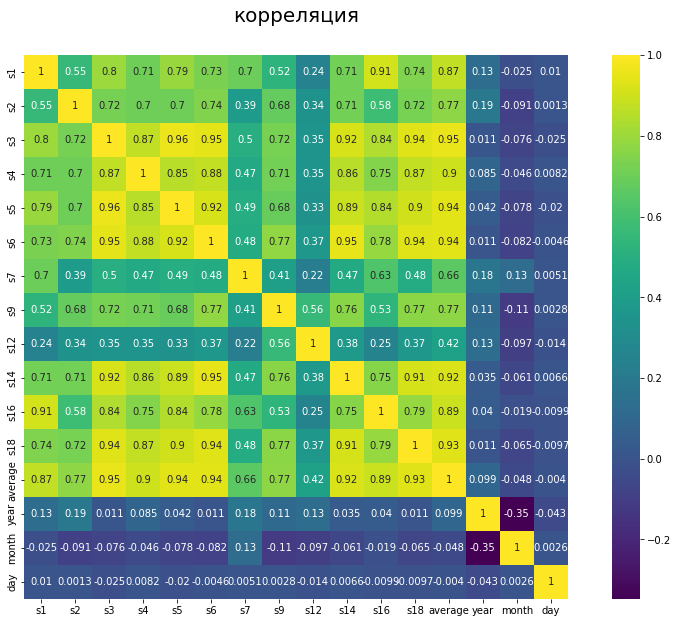

In [11]:
%matplotlib inline
colormap=plt.cm.viridis
plt.figure(figsize=(16,10))
plt.title('корреляция',y=1.05,size=20)
sns.heatmap(df.corr(),square=True,annot=True,cmap=colormap)
plt.show()

<AxesSubplot:title={'center':'pm 2.5 (2017 - 2020)'}, xlabel='date'>

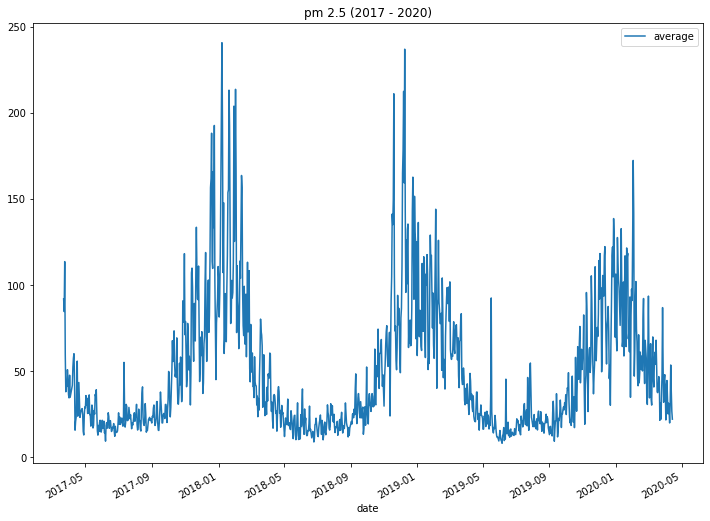

In [12]:
q_data = df[[x for x in df.columns if 'average' in x] + ['date']]
q_data.groupby('date').sum().plot(figsize=(12, 9), title = "pm 2.5 (2017 - 2020)")

<Figure size 1280x800 with 0 Axes>

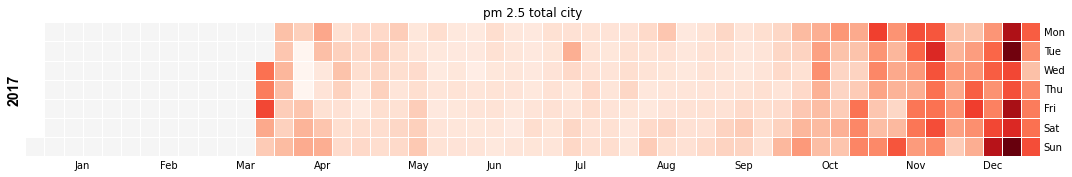

<Figure size 1280x800 with 0 Axes>

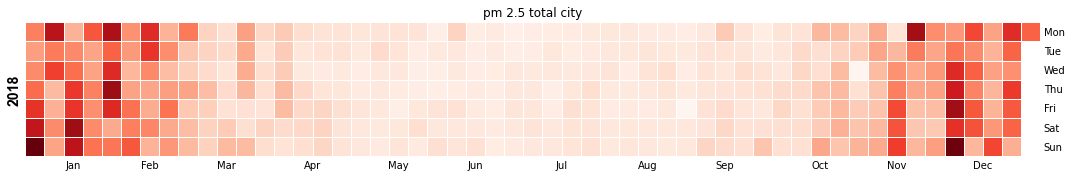

<Figure size 1280x800 with 0 Axes>

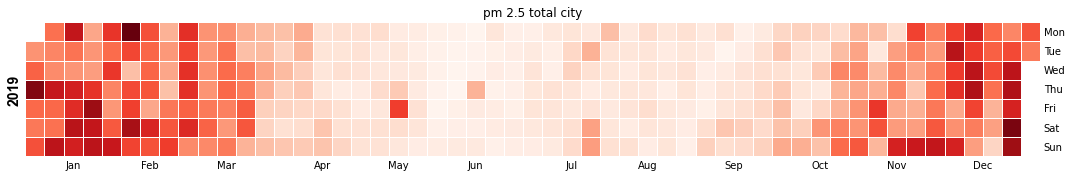

<Figure size 1280x800 with 0 Axes>

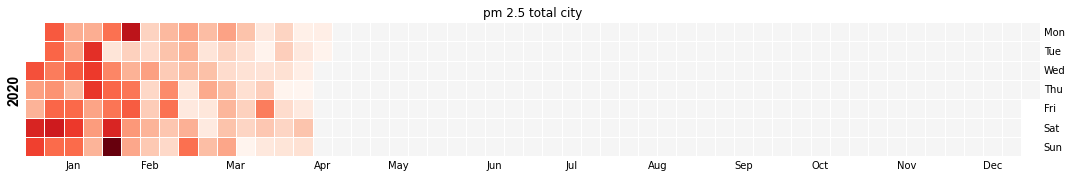

In [13]:
import calmap
%matplotlib inline
date_index = df['date']
df['date_index'] = date_index
df.set_index('date_index', inplace=True)

plt.figure(figsize=(16,10), dpi= 80)
calmap.calendarplot(df['2017']['average'], fig_kws={'figsize': (15,10)}, yearlabel_kws={'color':'black', 'fontsize':14}, 
                    subplot_kws={'title':'pm 2.5 total city'})
plt.show()
plt.figure(figsize=(16,10), dpi= 80)
calmap.calendarplot(df['2018']['average'], fig_kws={'figsize': (15,10)}, yearlabel_kws={'color':'black', 'fontsize':14}, 
                    subplot_kws={'title':'pm 2.5 total city'})
plt.show()
plt.figure(figsize=(16,10), dpi= 80)
calmap.calendarplot(df['2019']['average'], fig_kws={'figsize': (15,10)}, yearlabel_kws={'color':'black', 'fontsize':14}, 
                    subplot_kws={'title':'pm 2.5 total city'})
plt.show()
plt.figure(figsize=(16,10), dpi= 80)
calmap.calendarplot(df['2020']['average'], fig_kws={'figsize': (15,10)}, yearlabel_kws={'color':'black', 'fontsize':14}, 
                    subplot_kws={'title':'pm 2.5 total city'})
plt.show()

In [14]:
import plotly.express as px
'''VS Code uses jupyter to draw plotly graphic display and can't find the renderer of mimetype "application/vnd.plotly.v1+json" to solve the problem. - solve the problem:'''
import plotly.io as pio
pio.renderers.default = "notebook_connected"
   

df['chart_m'] = df['month']
df.chart_m.replace([1,2,3, 4, 5, 6, 7 ,8, 9, 10, 11, 12],
                ['winter','winter','spring','spring','spring','summer','summer','summer','autumn','autumn','autumn','winter'],
                   inplace=True)
fig = px.pie(df, values='average', names='chart_m')
fig.update_traces(textposition='inside', textinfo='percent+label', title = '4 season')
fig.show()

df['chart_m'] = df['month']
df.chart_m.replace([1,2,3, 4, 5, 6, 7 ,8, 9, 10, 11, 12],
['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November','December'], 
                   inplace=True)

fig = px.pie(df, values='average', names='chart_m', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', title = '12 months')
fig.show()


df.chart_m.replace(['January', 'February', 'March', 'April', 'May', 'June', 'July',
                    'August', 'September', 'October', 'November', 'December'],
                ['heating','heating','heating','heating','not_heating','not_heating',
                 'not_heating','not_heating','not_heating','heating','heating','heating'], inplace=True)
fig = px.pie(df, values='average', names='chart_m',color_discrete_map={'heating':'Red','not_heating':'Blue',})
fig.update_traces(textposition='inside', textinfo='percent+label', title = 'heating (October - April)')
fig.show()


In [15]:
pio.renderers.default = "notebook_connected"

df['chart_m'] = df['month']
df.chart_m.replace([1,2,3, 4, 5, 6, 7 ,8, 9, 10, 11, 12],
                ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 
                 'December'], inplace=True)

fig = px.bar(df, x="chart_m", y="average", color="s1",
  animation_frame="year", hover_data=['s1','s2','s3','s4','s5','s6','s7','s9',  's12', 's14', 's16','s18','day'],
             range_y=[0,3500])

fig.show(figsize=(15, 10))

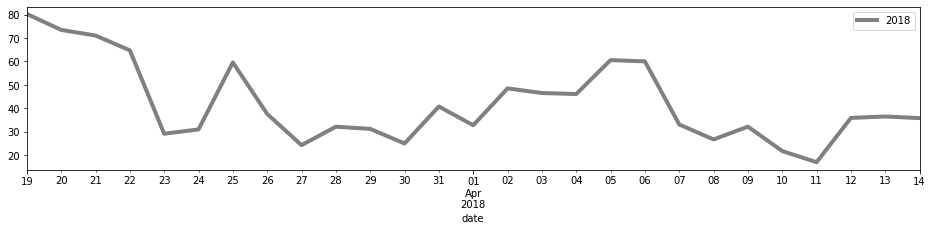

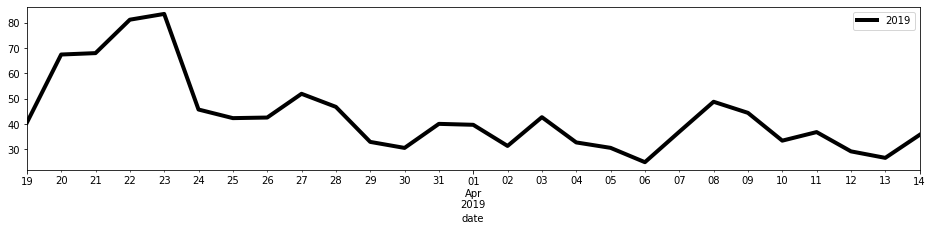

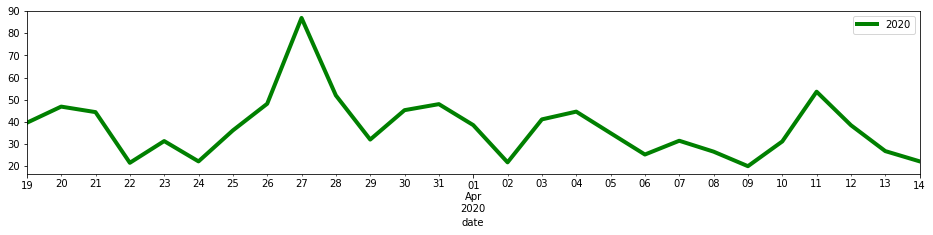

In [16]:
k = ('2018-03-19' <= df['date']) & (df['date'] <= '2018-04-14')
df.loc[k].plot(x='date',y='average',figsize=(16, 3),
               label='2018', color='grey', linewidth=4)

k2 = ('2019-03-19' <= df['date']) & (df['date'] <= '2019-04-14')
df.loc[k2].plot(x='date',y='average',figsize=(16, 3),
                label='2019', color='black', linewidth=4)

k3 = ('2020-03-19' <= df['date']) & (df['date'] <= '2020-04-14')
df.loc[k3].plot(x='date',y='average',figsize=(16, 3),
                label='2020', color='green', linewidth=4)
plt.legend()

In [17]:
df = pd.read_excel("C:/Users/masterx/Desktop/Анализ данных Python/docum/coordinate.xlsx")
lat = df['lat']
lon = df['lon']
strt = df['street']
t=df['year17'] #2018,2019

def color_change(t):
    if(t < 10):
        return('green')
    elif(10 < t <20):
        return('lime')
    elif( 20< t <30):
        return('gold')
    elif( 30< t <40):
        return('orange')
    elif( 40< t <50):
        return('orangered') 
    elif( 50< t <70):
        return('firebrick') 
    elif( 70< t <1000):
        return('darkred')
    else:
        return('black')
    
map = folium.Map(location=[43.313,76.939], zoom_start = 10, tiles = "openstreetmap")#CartoDB dark_matter

for lat, lon, strt,t in zip(lat, lon, strt,t):
    folium.CircleMarker(location=[lat, lon],radius = 9, popup=(str(strt),float(t)),
                        fill_color=color_change(t), color="gray", fill_opacity = 0.5).add_to(map)

map.save("sensor_location.html")
map

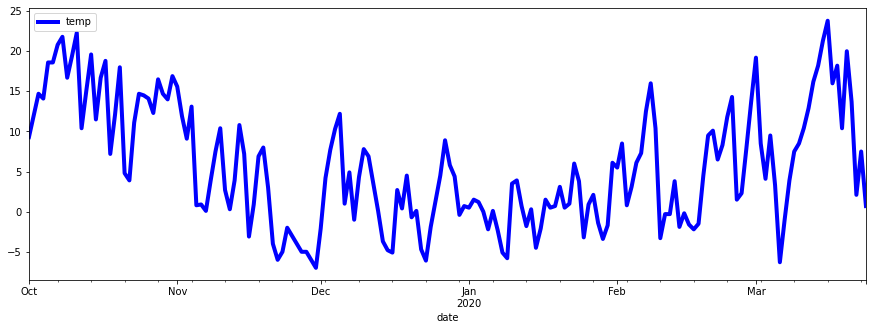

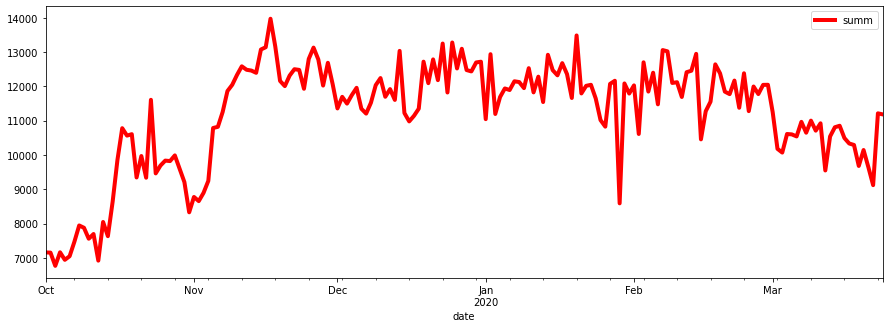

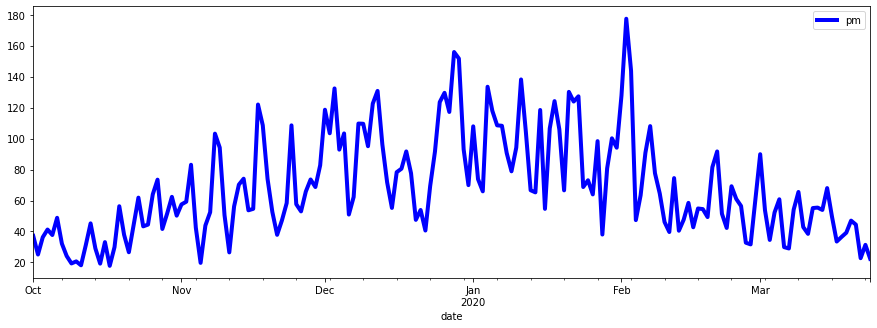

In [18]:
df = pd.read_excel("C:/Users/masterx/Desktop/Анализ данных Python/docum/coal.xlsx")
t = df[[x for x in df.columns if 'temp' in x] + ['date']]
t.groupby('date').sum().plot(figsize=(15,5),label='2020', color='blue', linewidth=4)
q_data = df[[x for x in df.columns if 'summ' in x] + ['date']]
q_data.groupby('date').sum().plot(figsize=(15, 5),label='2020', color='red', linewidth=4)

b = df[[x for x in df.columns if 'pm' in x] + ['date']]
b.groupby('date').sum().plot(figsize=(15, 5),label='2020', color='blue', linewidth=4)

plt.legend()

In [19]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
import seaborn as seabornInstance 
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras import initializers
plt.style.use('ggplot')
%matplotlib inline

df = pd.read_excel("C:/Users/masterx/Desktop/Анализ данных Python/docum/pm.xlsx")
col = df.loc[: , "s1":"s18"]
df['average'] = col.mean(axis=1)
df.drop(['s1','s2', 's3','s4', 's5','s6', 's7','s9', 's12','s14', 's16','s18'], axis=1, inplace = True)

Text(0, 0.5, 'log10 (pm2.5)')

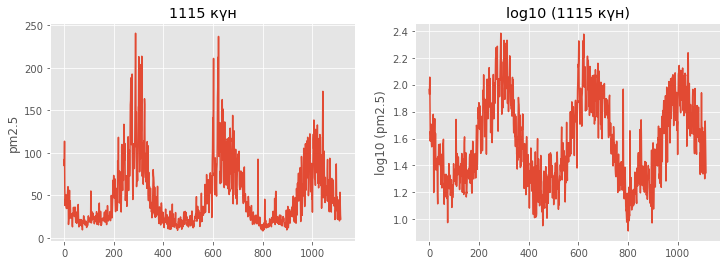

In [20]:
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
df['average'].plot(ax=ax1)
ax1.set_title(u'1115 күн')
ax1.set_ylabel(u'pm2.5')

ax2 = fig.add_subplot(122)
pd.Series(np.log10(df['average'])).plot(ax=ax2)
ax2.set_title(u'log10 (1115 күн)')
ax2.set_ylabel(u'log10 (pm2.5)')

In [21]:
#логарифмдау
df['log_y'] = np.log10(df['average'])
#  Күндер саны
month = df['date'].dt.month
df['month'] = month
df['num'] = range(1, len(df) + 1)
df2 = df.drop(columns=["date", "average"])

#Ай индикаторларын береміз
def membership_map(pandas_series, groups_dict):
    groups = {x: k for k, v in groups_dict.items() for x in v}
    mapped_series = pandas_series.map(groups)
    return mapped_series  

groups_dict = {1: [1], 0: [2,3,4,5,6,7,8,9,10,11,12]}
mapped_data = membership_map(df['month'], groups_dict)
df2["m01"] = mapped_data

groups_dict = {1: [2], 0: [1,3,4,5,6,7,8,9,10,11,12]}
mapped_data = membership_map(df['month'], groups_dict)
df2["m02"] = mapped_data

groups_dict = {1: [3], 0: [1,2,4,5,6,7,8,9,10,11,12]}
mapped_data = membership_map(df['month'], groups_dict)
df2["m03"] = mapped_data

groups_dict = {1: [4], 0: [1,2,3,5,6,7,8,9,10,11,12]}
mapped_data = membership_map(df['month'], groups_dict)
df2["m04"] = mapped_data

groups_dict = {1: [5], 0: [1,2,3,4,6,7,8,9,10,11,12]}
mapped_data = membership_map(df['month'], groups_dict)
df2["m05"] = mapped_data

groups_dict = {1: [6], 0: [1,2,3,4,5,7,8,9,10,11,12]}
mapped_data = membership_map(df['month'], groups_dict)
df2["m06"] = mapped_data

groups_dict = {1: [7], 0: [1,2,3,4,5,6,8,9,10,11,12]}
mapped_data = membership_map(df['month'], groups_dict)
df2["m07"] = mapped_data

groups_dict = {1: [8], 0: [1,2,3,4,5,6,7,9,10,11,12]}
mapped_data = membership_map(df['month'], groups_dict)
df2["m08"] = mapped_data

groups_dict = {1: [9], 0: [1,2,3,4,5,6,7,8,10,11,12]}
mapped_data = membership_map(df['month'], groups_dict)
df2["m09"] = mapped_data

groups_dict = {1: [10], 0: [1,2,3,4,5,6,7,8,9,11,12]}
mapped_data = membership_map(df['month'], groups_dict)
df2["m10"] = mapped_data

groups_dict = {1: [11], 0: [1,2,3,4,5,6,7,8,9,10,12]}
mapped_data = membership_map(df['month'], groups_dict)
df2["m11"] = mapped_data

groups_dict = {1: [12], 0: [1,2,3,4,5,6,7,8,9,10,11]}
mapped_data = membership_map(df['month'], groups_dict)
df2["m12"] = mapped_data

In [22]:
#  Отклик матрицасын құрамыз.
y = df2['log_y']
#  предиктор матрицасын құрамыз.
X = df2.drop(columns=["log_y","month"])
#  Оқыту және тест бөлеміз
X_train = X[:837]
y_train = y[:837]
X_test  = X[837:]
y_test  = y[837:]
#  Нейрондық желіні оқытамыз
model = Sequential()
model.add(Dense(8, input_dim=13, activation='sigmoid'))
model.add(Dense(12, activation='sigmoid'))
model.add(Dense(1, activation='linear'))
# моделін жасаймыз
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_percentage_error'])
# модельді оқыту
model.fit(X_train, y_train, epochs=300, batch_size=1)

Epoch 1/300
837/837 [==============================] - 2s 1ms/step - loss: 0.1051 - mean_absolute_percentage_error: 18.3177
Epoch 2/300
837/837 [==============================] - 1s 1ms/step - loss: 0.1048 - mean_absolute_percentage_error: 18.1441
Epoch 3/300
837/837 [==============================] - 1s 1ms/step - loss: 0.1033 - mean_absolute_percentage_error: 17.9861
Epoch 4/300
837/837 [==============================] - 1s 2ms/step - loss: 0.1033 - mean_absolute_percentage_error: 18.1013
Epoch 5/300
837/837 [==============================] - 1s 2ms/step - loss: 0.1028 - mean_absolute_percentage_error: 18.0452
Epoch 6/300
837/837 [==============================] - 1s 1ms/step - loss: 0.1040 - mean_absolute_percentage_error: 18.1772
Epoch 7/300
837/837 [==============================] - 1s 1ms/step - loss: 0.1030 - mean_absolute_percentage_error: 17.9801A: 0s - loss: 0.1093 - mean_absolute_percentage
Epoch 8/300
837/837 [==============================] - 1s 1ms/step - loss: 0.1039 - m

In [23]:
model = LinearRegression()
model.fit(X, y)

coef = pd.DataFrame(list(zip(['intercept'] + X.columns.tolist(), [model.intercept_] + model.coef_.tolist())),
                    columns=['predictor', 'coef'])

from scipy import stats

def regression_coef(model, X, y):
    coef = pd.DataFrame(list(zip(['intercept'] + X.columns.tolist(), [model.intercept_] + model.coef_.tolist())),
                    columns=['predictor', 'coef'])
    X1 = np.append(np.ones((len(X),1)), X, axis=1)
    b = np.append(model.intercept_, model.coef_)
    MSE = np.sum((model.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
    var_b = MSE * (np.linalg.inv(np.dot(X1.T, X1)).diagonal())
    sd_b = np.sqrt(var_b)
    t = b / sd_b
    coef['pvalue'] = [2 * (1 - stats.t.cdf(np.abs(i), (len(X1) - 1))) for i in t]
    return coef

pred = pd.DataFrame({
    'pred': model.predict(X),
    'real': y})
#  Болжамдарды есептеу үшін матрицаны дайындаймыз
#  Алдымен күндерді береміз
df3= pd.DataFrame()
df3['num'] = range(1116, 1530)

In [24]:
#  Ай көрсеткіштерін қосамыз
groups_dict = {1: [1], 0: [2,3,4,5,6,7,8,9,10,11,12]}
mapped_data = membership_map(df['month'], groups_dict)
df3["m01"] = mapped_data

groups_dict = {1: [2], 0: [1,3,4,5,6,7,8,9,10,11,12]}
mapped_data = membership_map(df['month'], groups_dict)
df3["m02"] = mapped_data

groups_dict = {1: [3], 0: [1,2,4,5,6,7,8,9,10,11,12]}
mapped_data = membership_map(df['month'], groups_dict)
df3["m03"] = mapped_data

groups_dict = {1: [4], 0: [1,2,3,5,6,7,8,9,10,11,12]}
mapped_data = membership_map(df['month'], groups_dict)
df3["m04"] = mapped_data

groups_dict = {1: [5], 0: [1,2,3,4,6,7,8,9,10,11,12]}
mapped_data = membership_map(df['month'], groups_dict)
df3["m05"] = mapped_data

groups_dict = {1: [6], 0: [1,2,3,4,5,7,8,9,10,11,12]}
mapped_data = membership_map(df['month'], groups_dict)
df3["m06"] = mapped_data

groups_dict = {1: [7], 0: [1,2,3,4,5,6,8,9,10,11,12]}
mapped_data = membership_map(df['month'], groups_dict)
df3["m07"] = mapped_data

groups_dict = {1: [8], 0: [1,2,3,4,5,6,7,9,10,11,12]}
mapped_data = membership_map(df['month'], groups_dict)
df3["m08"] = mapped_data

groups_dict = {1: [9], 0: [1,2,3,4,5,6,7,8,10,11,12]}
mapped_data = membership_map(df['month'], groups_dict)
df3["m09"] = mapped_data

groups_dict = {1: [10], 0: [1,2,3,4,5,6,7,8,9,11,12]}
mapped_data = membership_map(df['month'], groups_dict)
df3["m10"] = mapped_data

groups_dict = {1: [11], 0: [1,2,3,4,5,6,7,8,9,10,12]}
mapped_data = membership_map(df['month'], groups_dict)
df3["m11"] = mapped_data

groups_dict = {1: [12], 0: [1,2,3,4,5,6,7,8,9,10,11]}
mapped_data = membership_map(df['month'], groups_dict)
df3["m12"] = mapped_data

model.predict(df3)

array([1.65234829, 1.65226119, 1.65217408, 1.65208698, 1.65199988,
       1.65191278, 1.65182568, 1.65173858, 1.65165147, 1.65156437,
       1.42732463, 1.42723753, 1.42715043, 1.42706333, 1.42697623,
       1.42688913, 1.42680202, 1.42671492, 1.42662782, 1.42654072,
       1.42645362, 1.42636652, 1.42627941, 1.42619231, 1.42610521,
       1.42601811, 1.42593101, 1.42584391, 1.4257568 , 1.4256697 ,
       1.4255826 , 1.4254955 , 1.4254084 , 1.4253213 , 1.42523419,
       1.42514709, 1.42505999, 1.2398393 , 1.23975219, 1.23966509,
       1.23957799, 1.23949089, 1.23940379, 1.23931669, 1.23922958,
       1.23914248, 1.23905538, 1.23896828, 1.23888118, 1.23879408,
       1.23870697, 1.23861987, 1.23853277, 1.23844567, 1.23835857,
       1.23827147, 1.23818436, 1.23809726, 1.23801016, 1.23792306,
       1.23783596, 1.23774886, 1.23766175, 1.23757465, 1.23748755,
       1.23740045, 1.23731335, 1.23722625, 1.14329812, 1.14321101,
       1.14312391, 1.14303681, 1.14294971, 1.14286261, 1.14277

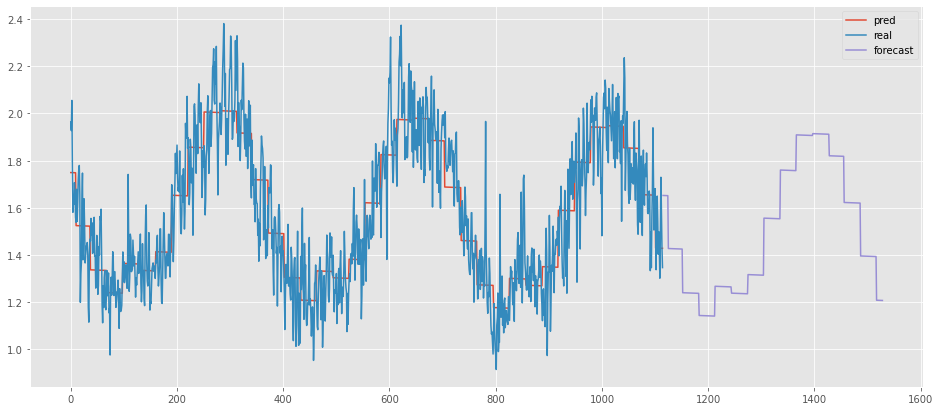

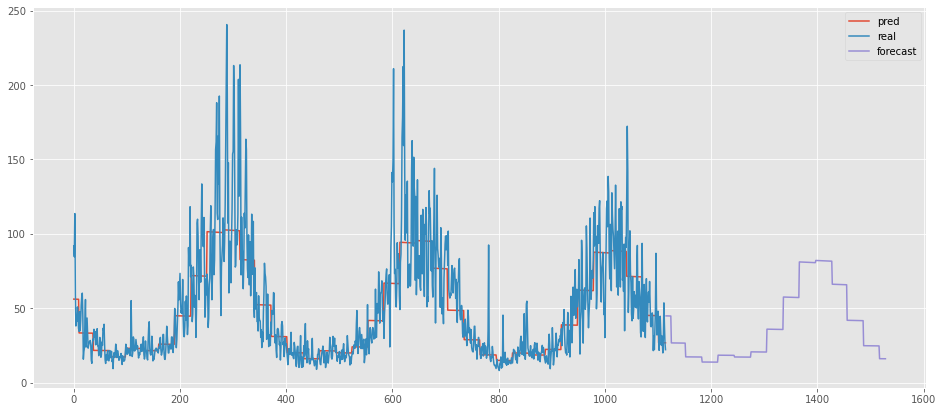

In [25]:
#  Бастапқы қатарға арналған болжам
y1 = 10**model.predict(df3)

pred['forecast'] = np.nan

#  болжаммен матрица
#  Бастапқы қатарға арналған болжам
df4 = pd.DataFrame(model.predict(df3), columns=['forecast'])
df4['real'] = np.nan
df4['pred'] = np.nan

#  біз матрицаларды біріктіреміз, жаңа индекстер орнатамыз
pred_1 = pd.concat(
    [pred, df4],
    sort=False
).reset_index(drop=True)
pred_1.plot(figsize=(16, 7))

#  Бастапқы қатарға ораламыз
pred_11 = 10**pred_1

pred_11.plot(figsize=(16, 7))

writer = pd.ExcelWriter('output.xlsx')
pred_11.to_excel(writer,'Sheet1')

writer.save()

In [26]:
import plotly.io as pio
df = pd.read_excel("C:/Users/masterx/Desktop/Анализ данных Python/docum/output1.xlsx")
fig = px.line(df, x="date", y="forecast", title='Прогноз среднесуточных показателей на 2020 год в г.Алматы')

pio.write_html(fig, file='bar.html', auto_open=True)